In [1]:
import cv2
import numpy as np

1 Spatial Frequency Techniques

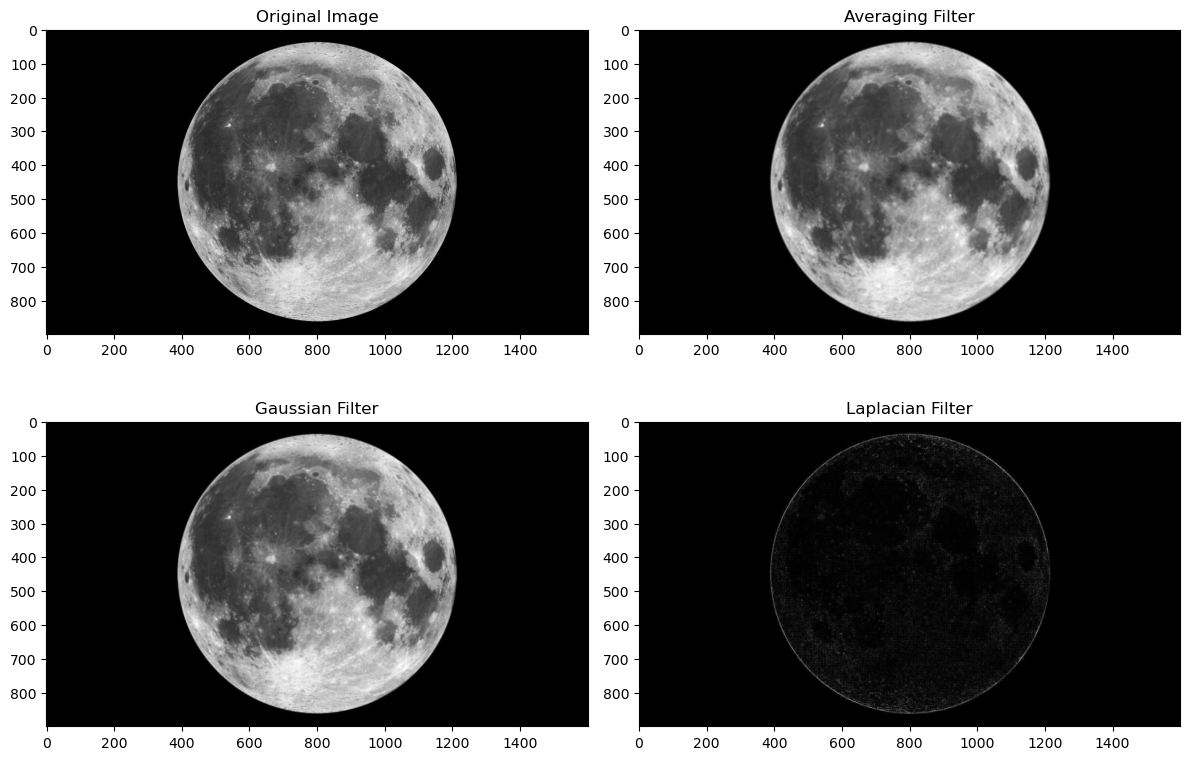

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Shrushti S G\Downloads\moon.jpg",cv2.IMREAD_GRAYSCALE)

# Define kernel size (must be an odd number for Median Filter)
kernel_size = 5

# 1. Averaging Filter (Mean Filter)
avg_filtered = cv2.blur(image, (kernel_size, kernel_size))

# 2. Weighted Average Filter (Gaussian Filter)
gaussian_filtered = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# 3. Laplacian Filter
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)  # Convert back to 8-bit image

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(avg_filtered, cmap='gray')
plt.title('Averaging Filter')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_filtered, cmap='gray')
plt.title('Laplacian Filter')

plt.tight_layout()
plt.show()


2 Spatial frequency techniques for smoothing and sharpening 

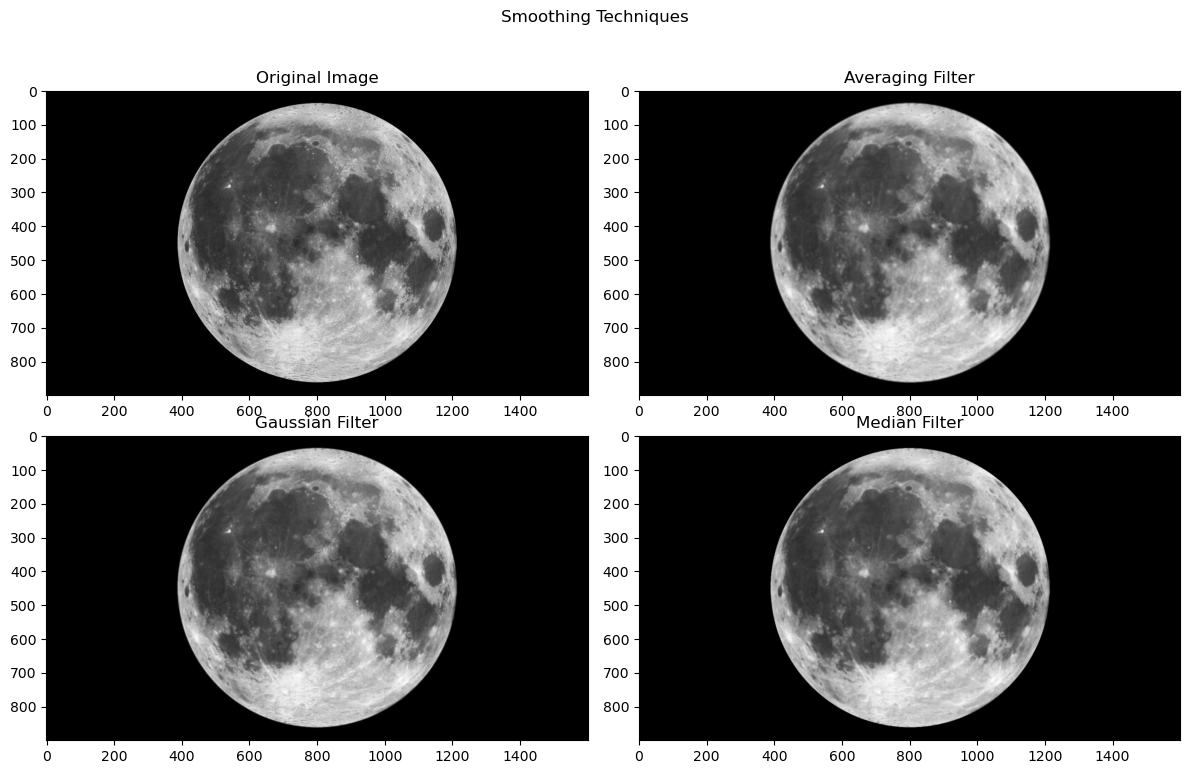

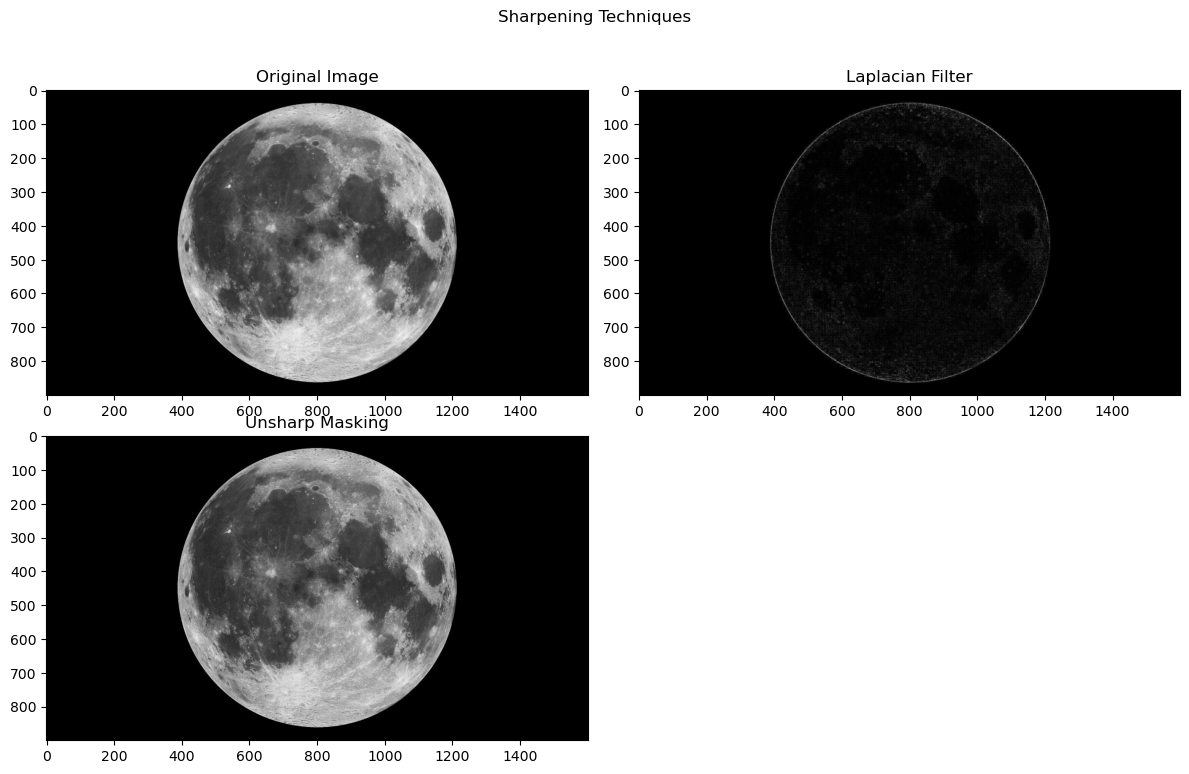

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Shrushti S G\Downloads\moon.jpg", cv2.IMREAD_GRAYSCALE)

# Define kernel size
kernel_size = 5

# 1. Smoothing Techniques

# a. Averaging Filter (Mean Filter)
avg_filtered = cv2.blur(image, (kernel_size, kernel_size))

# b. Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# c. Median Filter
median_filtered = cv2.medianBlur(image, kernel_size)

# 2. Sharpening Techniques

# a. Laplacian Filter
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)  # Convert back to 8-bit image

# b. Unsharp Masking
blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Display Smoothing Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(avg_filtered, cmap='gray')
plt.title('Averaging Filter')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')

plt.subplot(2, 2, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')

plt.suptitle('Smoothing Techniques')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display Sharpening Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(laplacian_filtered, cmap='gray')
plt.title('Laplacian Filter')

plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Unsharp Masking')

plt.suptitle('Sharpening Techniques')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


3 Image enhancement in Frequency domain

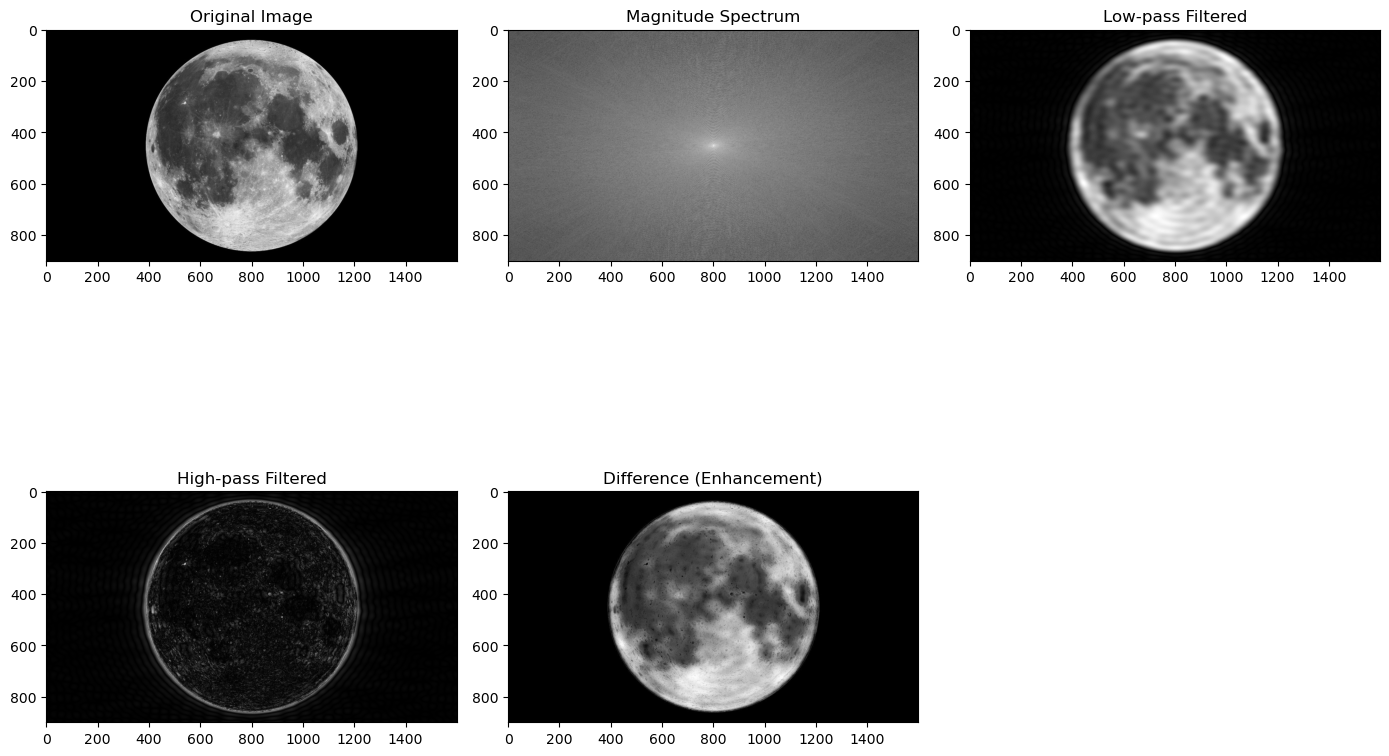

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shift_and_log(image):
    """ Shift and log transform for better visualization of frequency components. """
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    return magnitude_spectrum

def create_filter(shape, filter_type, cutoff):
    """ Create a low-pass or high-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols), np.float32)

    if filter_type == 'low-pass':
        for i in range(rows):
            for j in range(cols):
                distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
                if distance <= cutoff:
                    filter_mask[i, j] = 1
    elif filter_type == 'high-pass':
        filter_mask = np.ones((rows, cols), np.float32)
        for i in range(rows):
            for j in range(cols):
                distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
                if distance <= cutoff:
                    filter_mask[i, j] = 0
    
    return filter_mask

def apply_filter(f_shift, filter_mask):
    """ Apply the filter to the frequency domain image. """
    filtered_f_shift = f_shift * filter_mask
    f_ishift = np.fft.ifftshift(filtered_f_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Load the image
image = cv2.imread(r"C:\Users\Shrushti S G\Downloads\moon.jpg", cv2.IMREAD_GRAYSCALE)

# Compute Fourier Transform and magnitude spectrum
magnitude_spectrum = shift_and_log(image)

# Create Low-pass and High-pass filters
filter_mask_low = create_filter(image.shape, 'low-pass', 30)
filter_mask_high = create_filter(image.shape, 'high-pass', 30)

# Apply filters in frequency domain
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

low_pass_filtered = apply_filter(f_shift, filter_mask_low)
high_pass_filtered = apply_filter(f_shift, filter_mask_high)

# Display Results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(2, 3, 3)
plt.imshow(low_pass_filtered, cmap='gray')
plt.title('Low-pass Filtered')

plt.subplot(2, 3, 4)
plt.imshow(high_pass_filtered, cmap='gray')
plt.title('High-pass Filtered')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(low_pass_filtered - high_pass_filtered), cmap='gray')
plt.title('Difference (Enhancement)')

plt.tight_layout()
plt.show()


4 Low Pass Filters

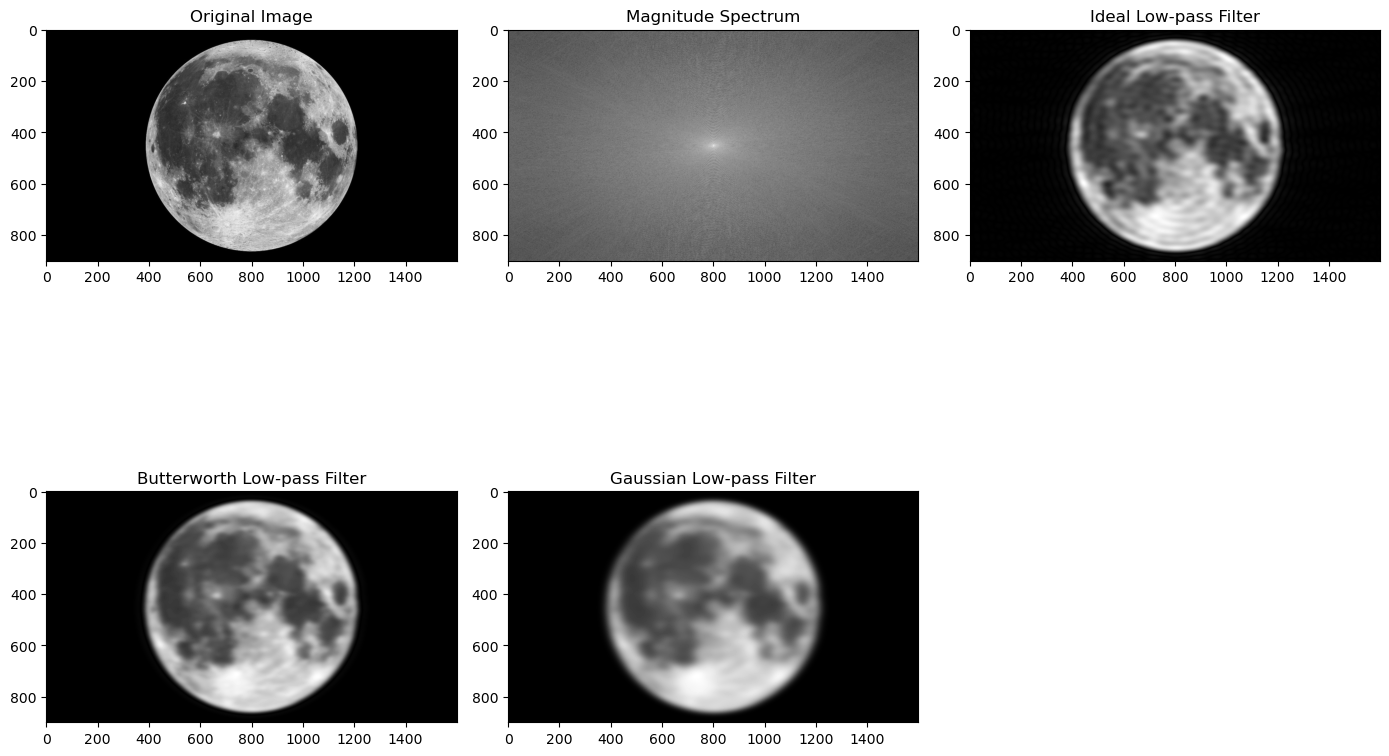

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shift_and_log(image):
    """ Shift and log transform for better visualization of frequency components. """
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    return f_shift, magnitude_spectrum

def create_ideal_filter(shape, cutoff):
    """ Create an ideal low-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if distance <= cutoff:
                filter_mask[i, j] = 1
    return filter_mask

def create_butterworth_filter(shape, cutoff, order):
    """ Create a Butterworth low-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            filter_mask[i, j] = 1 / (1 + (distance / cutoff)**(2 * order))
    return filter_mask

def create_gaussian_filter(shape, cutoff):
    """ Create a Gaussian low-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            filter_mask[i, j] = np.exp(-distance**2 / (2 * (cutoff / 2.0)**2))
    return filter_mask

def apply_filter(f_shift, filter_mask):
    """ Apply the filter to the frequency domain image. """
    filtered_f_shift = f_shift * filter_mask
    f_ishift = np.fft.ifftshift(filtered_f_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Load the image
image = cv2.imread(r"C:\Users\Shrushti S G\Downloads\moon.jpg", cv2.IMREAD_GRAYSCALE)

# Compute Fourier Transform and magnitude spectrum
f_shift, magnitude_spectrum = shift_and_log(image)

# Create filters
cutoff = 30
order = 2
ideal_filter = create_ideal_filter(image.shape, cutoff)
butterworth_filter = create_butterworth_filter(image.shape, cutoff, order)
gaussian_filter = create_gaussian_filter(image.shape, cutoff)

# Apply filters in frequency domain
ideal_filtered = apply_filter(f_shift, ideal_filter)
butterworth_filtered = apply_filter(f_shift, butterworth_filter)
gaussian_filtered = apply_filter(f_shift, gaussian_filter)

# Display Results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(2, 3, 3)
plt.imshow(ideal_filtered, cmap='gray')
plt.title('Ideal Low-pass Filter')

plt.subplot(2, 3, 4)
plt.imshow(butterworth_filtered, cmap='gray')
plt.title('Butterworth Low-pass Filter')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Low-pass Filter')

plt.tight_layout()
plt.show()


5 High Pass Filters

C:\Users\Shrushti S G\AppData\Local\Temp\ipykernel_54724\3094508458.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  filter_mask[i, j] = 1 / (1 + (cutoff / distance)**(2 * order))


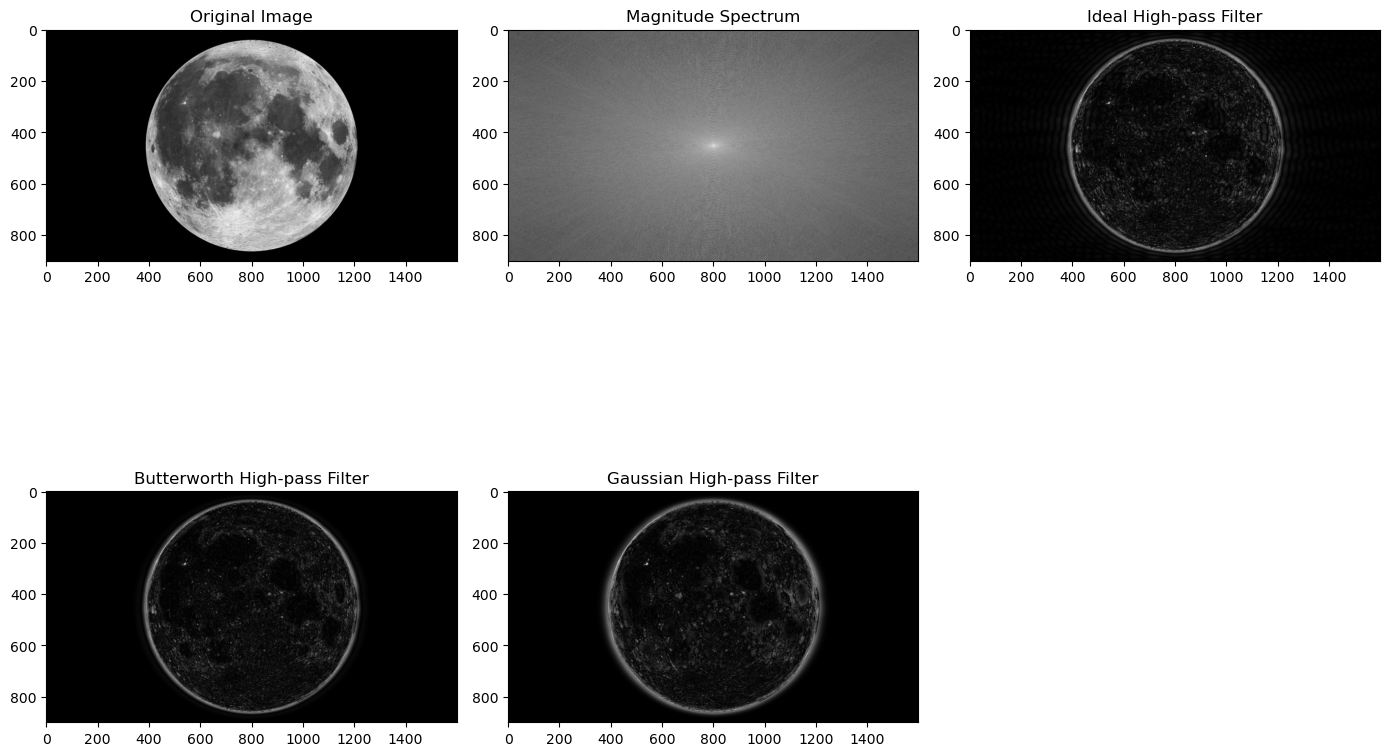

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shift_and_log(image):
    """ Shift and log transform for better visualization of frequency components. """
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    return f_shift, magnitude_spectrum

def create_ideal_highpass_filter(shape, cutoff):
    """ Create an ideal high-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if distance <= cutoff:
                filter_mask[i, j] = 0
    return filter_mask

def create_butterworth_highpass_filter(shape, cutoff, order):
    """ Create a Butterworth high-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            filter_mask[i, j] = 1 / (1 + (cutoff / distance)**(2 * order))
    return filter_mask

def create_gaussian_highpass_filter(shape, cutoff):
    """ Create a Gaussian high-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            filter_mask[i, j] = 1 - np.exp(-distance**2 / (2 * (cutoff / 2.0)**2))
    return filter_mask

def apply_filter(f_shift, filter_mask):
    """ Apply the filter to the frequency domain image. """
    filtered_f_shift = f_shift * filter_mask
    f_ishift = np.fft.ifftshift(filtered_f_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Load the image
image = cv2.imread(r"C:\Users\Shrushti S G\Downloads\moon.jpg", cv2.IMREAD_GRAYSCALE)

# Compute Fourier Transform and magnitude spectrum
f_shift, magnitude_spectrum = shift_and_log(image)

# Create high-pass filters
cutoff = 30
order = 2
ideal_highpass_filter = create_ideal_highpass_filter(image.shape, cutoff)
butterworth_highpass_filter = create_butterworth_highpass_filter(image.shape, cutoff, order)
gaussian_highpass_filter = create_gaussian_highpass_filter(image.shape, cutoff)

# Apply filters in frequency domain
ideal_highpass_filtered = apply_filter(f_shift, ideal_highpass_filter)
butterworth_highpass_filtered = apply_filter(f_shift, butterworth_highpass_filter)
gaussian_highpass_filtered = apply_filter(f_shift, gaussian_highpass_filter)

# Display Results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(2, 3, 3)
plt.imshow(ideal_highpass_filtered, cmap='gray')
plt.title('Ideal High-pass Filter')

plt.subplot(2, 3, 4)
plt.imshow(butterworth_highpass_filtered, cmap='gray')
plt.title('Butterworth High-pass Filter')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_highpass_filtered, cmap='gray')
plt.title('Gaussian High-pass Filter')

plt.tight_layout()
plt.show()


6 Compare LPF & HPF

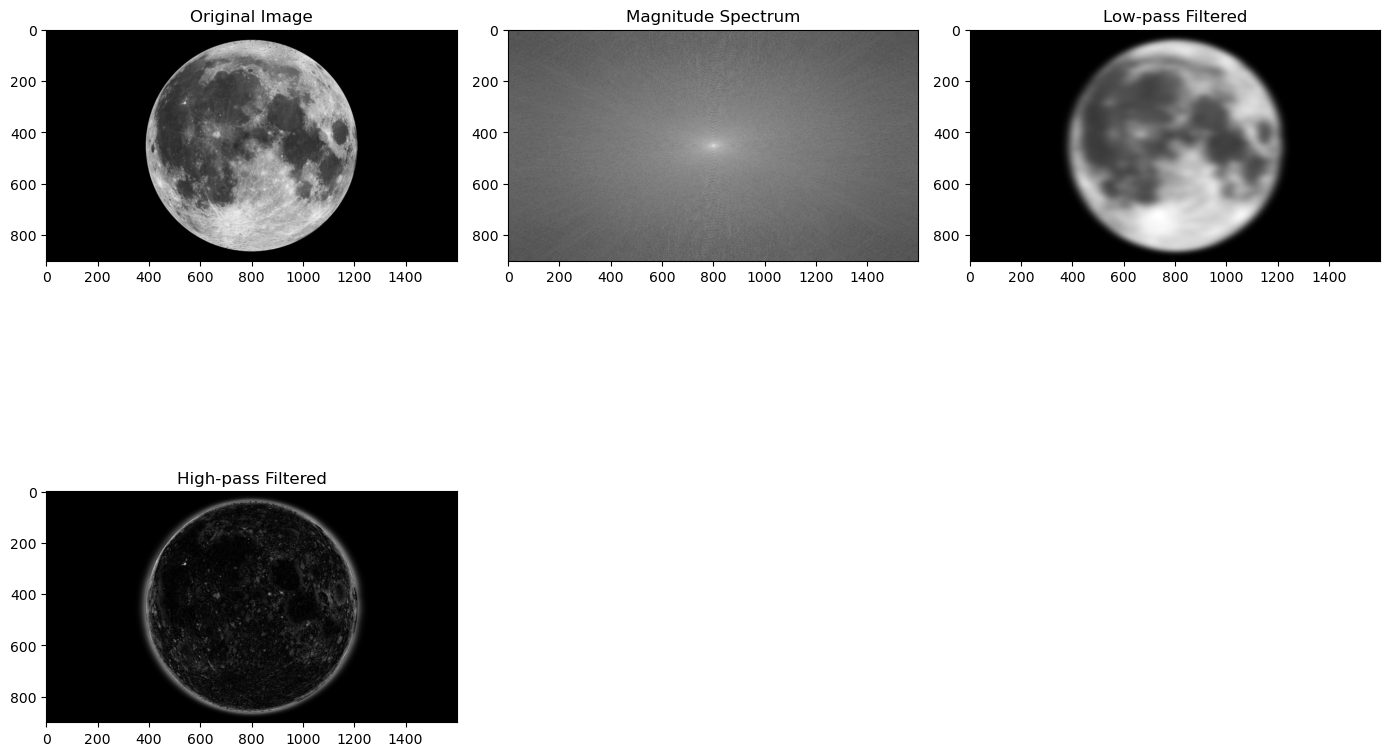

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shift_and_log(image):
    """ Shift and log transform for better visualization of frequency components. """
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    return f_shift, magnitude_spectrum

def create_lowpass_filter(shape, cutoff):
    """ Create a Gaussian low-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            filter_mask[i, j] = np.exp(-distance**2 / (2 * (cutoff / 2.0)**2))
    return filter_mask

def create_highpass_filter(shape, cutoff):
    """ Create a Gaussian high-pass filter. """
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            filter_mask[i, j] = 1 - np.exp(-distance**2 / (2 * (cutoff / 2.0)**2))
    return filter_mask

def apply_filter(f_shift, filter_mask):
    """ Apply the filter to the frequency domain image. """
    filtered_f_shift = f_shift * filter_mask
    f_ishift = np.fft.ifftshift(filtered_f_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Load the image
image = cv2.imread(r"C:\Users\Shrushti S G\Downloads\moon.jpg", cv2.IMREAD_GRAYSCALE)

# Compute Fourier Transform and magnitude spectrum
f_shift, magnitude_spectrum = shift_and_log(image)

# Create filters
cutoff = 30
lowpass_filter = create_lowpass_filter(image.shape, cutoff)
highpass_filter = create_highpass_filter(image.shape, cutoff)

# Apply filters in frequency domain
lowpass_filtered = apply_filter(f_shift, lowpass_filter)
highpass_filtered = apply_filter(f_shift, highpass_filter)

# Display Results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(2, 3, 3)
plt.imshow(lowpass_filtered, cmap='gray')
plt.title('Low-pass Filtered')

plt.subplot(2, 3, 4)
plt.imshow(highpass_filtered, cmap='gray')
plt.title('High-pass Filtered')

plt.tight_layout()
plt.show()
